In [53]:
import tweepy
from textblob import TextBlob
import jsonpickle
import pandas as pd
import json

In [54]:
CONSUMER_KEY = 'poJVXF1Bj0ZFSNTftumHiv6WB'
CONSUMER_SECRET = 'Q9m2j7hpL2rtk2aNyzyeXUKLVrobwo87fCv9RIzNzMql9YmhzU'
ACCESS_KEY = '1334436583819264000-JXLkeHdYUZkoUrvJEmxDVaBcFpnTlE'
ACCESS_SECRET = 'XrtqWr0bnOaRDOLOX07vxroFXauFuaCvfvfde3IiABJbl'


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
auth.secure = True
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [64]:

searchQuery = 'mdh owner death'
retweet_filter='-filter:retweets'

q=searchQuery+retweet_filter
tweetsPerQry = 100
fName = 'tweets.txt'
sinceId = None

In [65]:
max_id = -1
maxTweets = 1000

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        tweets = []
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry, tweet_mode='extended')

                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        since_id=sinceId, tweet_mode='extended')
            else:
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1), tweet_mode='extended')
                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1),
                                        since_id=sinceId, tweet_mode='extended')

            if not new_tweets:
                print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(str(tweet.full_text.replace('\n','').encode("utf-8"))+"\n")

            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
                
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break
                
print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

Downloaded 76 tweets
No more tweets found
Downloaded 76 tweets, Saved to tweets.txt


In [66]:
import re

def clean(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@[A-Za-z0–9]+', '', tweet) 
    return tweet

def read_tweets(file_name):
    with open(file_name, 'r') as f:
        tweets = [clean(line.strip()) for line in f]
    f.close()
    return tweets

In [67]:
tweets = read_tweets(fName)
print(tweets[2])
print(TextBlob(tweets[2]).sentiment)

b'"Asli masale sach sach MDH MDH"\xe2\x80\x98Mahashay\xe2\x80\x99 Dharampal Gulati, the owner of Indian spices company Mahashian Di Hatti (MDH) passed away on Thursday at a New Delhi hospital. He was 97 at the time of his deathMDHMDH'
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)


In [68]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [69]:
import numpy as np

tweet_polarity = np.zeros(len(tweets))
tweet_subjectivity = np.zeros(len(tweets))

for idx, tweet in enumerate(tweets):
    tweet_polarity[idx] = polarity(tweet)
    tweet_subjectivity[idx] = subjectivity(tweet)

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

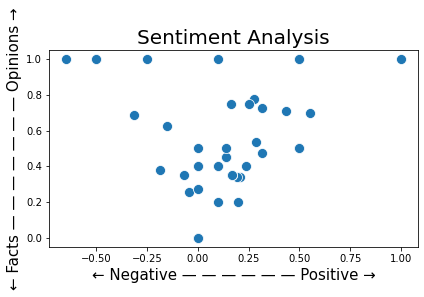

In [71]:

sns.scatterplot(tweet_polarity, # X-axis
                tweet_subjectivity,  # Y-axis
                s=100);


plt.title("Sentiment Analysis", fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.tight_layout()

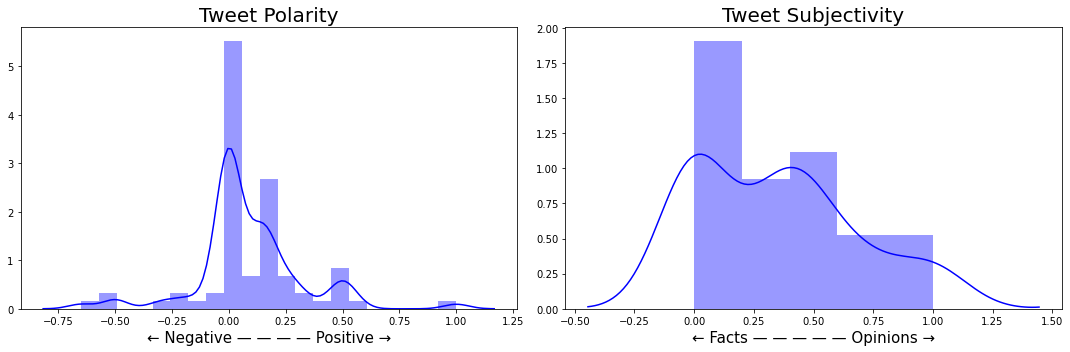

In [72]:

f, axs = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(tweet_polarity, color="b", ax=axs[0])
axs[0].set_title("Tweet Polarity", fontsize = 20)
axs[0].set_xlabel('← Negative — — — — Positive →', fontsize=15)
sns.distplot(tweet_subjectivity, color="b", ax=axs[1])
axs[1].set_title("Tweet Subjectivity", fontsize = 20)
axs[1].set_xlabel('← Facts — — — — — Opinions →', fontsize=15)

plt.tight_layout()